## Analyze a dataset of the global average sea level change since 1880 and use the data to predict the sea level change through year 2050.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Import the data from epa-sea-level.csv

In [2]:
df=pd.read_csv('Desktop/epa-sea-level.CSV')

In [3]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


### Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.

Text(0.5, 1.0, 'Rise in Sea Level')

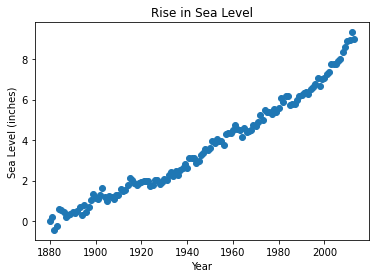

In [30]:
plt.scatter('Year','CSIRO Adjusted Sea Level',data=df)
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

### Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [6]:
lin=linregress(df['Year'],df['CSIRO Adjusted Sea Level'])
lin

LinregressResult(slope=0.06304458401213482, intercept=-119.06594196773983, rvalue=0.984757131182585, pvalue=3.788696979113155e-102, stderr=0.0009692118713287152, intercept_stderr=1.886943381242523)

Text(0.5, 1.0, 'Rise in Sea Level')

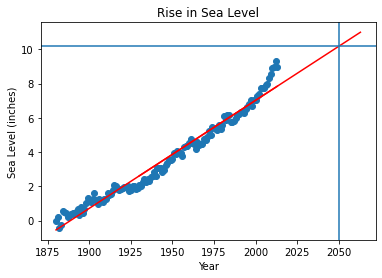

In [28]:
plt.scatter('Year','CSIRO Adjusted Sea Level',data=df)
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.plot(df['Year'],lin.intercept+lin.slope*(df['Year']),'r',alpha=1)
plt.plot(df['Year']+50,lin.intercept+lin.slope*(df['Year']+50),'r',alpha=1)
plt.axhline(lin.slope*2050+lin.intercept,xmin=0,xmax=2050)
plt.axvline(2050,ymax=lin.slope*2050+lin.intercept)
plt.title('Rise in Sea Level')

### Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

In [23]:
df_new=df[df['Year']>=2000]
df_new.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933


In [17]:
lin2=linregress(df_new['Year'],df_new['CSIRO Adjusted Sea Level'])
lin2

LinregressResult(slope=0.1664272733318682, intercept=-325.7934668059649, rvalue=0.9762875716140618, pvalue=2.4388064141618245e-09, stderr=0.010652933111541163, intercept_stderr=21.375153425608215)

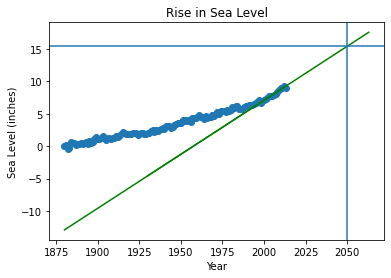

In [37]:
plt.scatter('Year','CSIRO Adjusted Sea Level',data=df)
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.plot(df['Year'], lin2.intercept+lin2.slope*(df['Year']),'g',alpha=1)
plt.plot(df['Year']+50,lin2.intercept+lin2.slope*(df['Year']+50),'g',alpha=1)
plt.axhline(lin2.slope*2050+lin2.intercept,xmin=0,xmax=2050)
plt.axvline(2050,ymax=lin2.slope*2050+lin2.intercept)